In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

In [50]:
# Importar nuestro dataset desde un CSV y mostrar las primeras 5 filas
dataset = pd.read_csv('.\\documents\\salarios.csv')
dataset.head()

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [3]:
# Mostrar la forma que tiene nuestro dataset
dataset.shape

(30, 2)

In [11]:
# Obtener los valores de 'x' e 'y'
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

[[10. ]
 [ 8. ]
 [ 5.4]
 [ 2.5]
 [ 1. ]
 [ 8. ]
 [ 4. ]
 [ 6. ]
 [ 2. ]
 [10. ]
 [ 4. ]
 [ 7. ]
 [ 3. ]
 [ 5. ]
 [ 2. ]
 [ 5. ]
 [ 3. ]
 [ 2. ]
 [ 3. ]
 [ 2. ]
 [ 5. ]
 [ 3.4]
 [ 5.3]
 [ 2.1]
 [ 9.2]
 [10. ]
 [ 3.2]
 [10. ]
 [ 4. ]
 [ 1. ]]


In [7]:
# Obtener los valores de entrenamiento y de prueba para 'x' e 'y'
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                   random_state=0)

In [8]:
# Mostrar con que datos va a entrenar el modelo
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

In [12]:
# Creacion de nueestro modelo
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

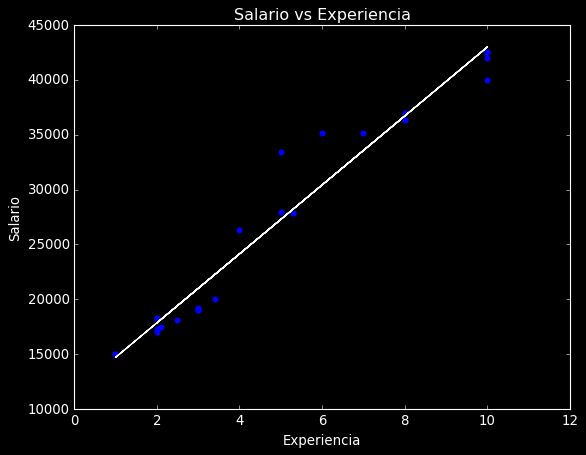

In [18]:
# Mostrar de manera visual como se aprendio con los datos de entrenamiento
plt.style.use('dark_background')
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='white')
plt.title('Salario vs Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

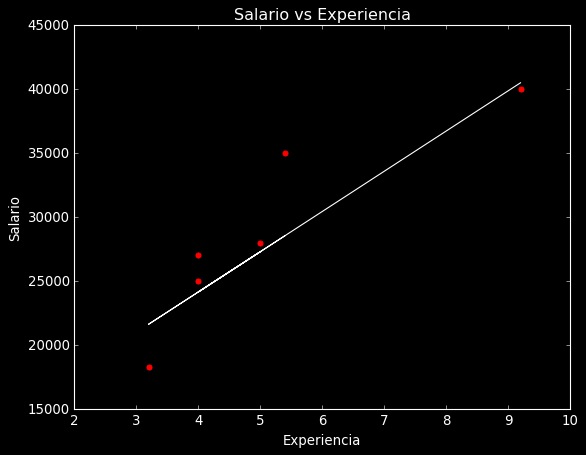

In [19]:
# Mostrar de manera visual como se aprendio con los datos de test
plt.style.use('dark_background')
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, regressor.predict(X_test), color='white')
plt.title('Salario vs Experiencia')
plt.xlabel('Experiencia')
plt.ylabel('Salario')
plt.show()

In [24]:
print('Aprendizaje con datos nuevos:', regressor.score(X_test, Y_test) * 100, '%')

Aprendizaje con datos nuevos: 78.62437374732998 %


In [27]:
# Ejercicio: Con el mismo dataset, agregar otra columna con el campo 'pais' y desarrollar
# para ver si mejora 

In [51]:
# Definir los paises en un array
paises = ['MX', 'BR', 'PE', 'CO']

In [52]:
# Convertir los paises a numero
paises2Number =  preprocessing.LabelEncoder()
paises_encoded = paises2Number.fit_transform(paises)
print(paises_encoded)

[2 0 3 1]


In [53]:
# Crear de forma aleatoria los 30 elementos para el dataset
paises_dataset = [random.choice(paises_encoded) for i in range(len(dataset))]

In [54]:
# Crear una columna nueva en el dataset llamada 'pais' y agregar los datos previamente creados
dataset['pais'] = paises_dataset
dataset.head()

,Aexperiencia,Salario,pais
0,10.0,42500,2
1,8.0,36302,1
2,5.4,35000,0
3,2.5,18103,1
4,1.0,15000,2


In [55]:
# Dividiendo las columnas en 'x' e 'y'
x = dataset.drop('Salario', axis=1)
y = dataset.iloc[:,1].values

In [56]:
## Obtener los valores de entrenamiento y de prueba para 'x' e 'y'
X_train, X_test, Y_train, Y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                   random_state=0)

In [57]:
# Creacion de nueestro modelo
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

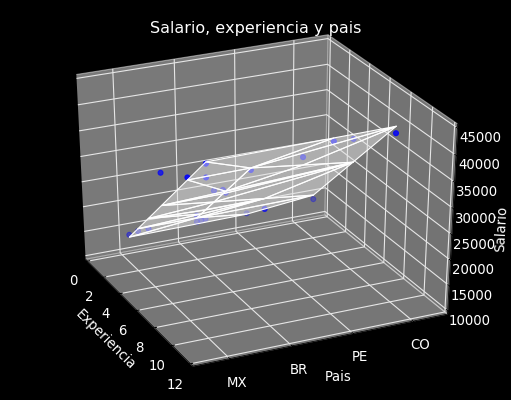

In [58]:
# Mostrar de manera visual como se aprendio con los datos de entrenamiento
plt.style.use('dark_background')
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_train['Aexperiencia'], X_train['pais'], Y_train, color='blue')
viz_train.plot_trisurf(X_train['Aexperiencia'], X_train['pais'], regressor.predict(X_train),
                      color='white', alpha=0.5)
viz_train.set_title('Salario, experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(paises2Number.inverse_transform(paises_encoded))
viz_train.azim=-25
fig.show

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

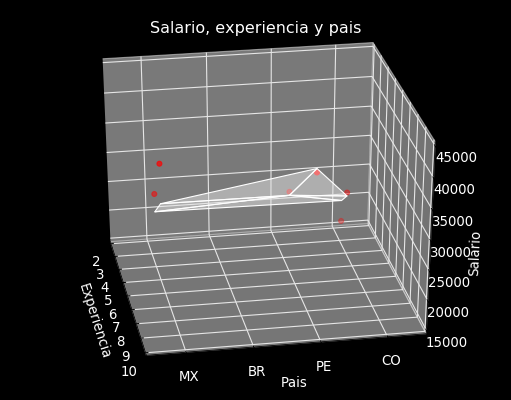

In [59]:
# Mostrar de manera visual como se aprendio con los datos de test
plt.style.use('dark_background')
fig = plt.figure()
viz_train = fig.add_subplot(111, projection='3d')
viz_train.scatter(X_test['Aexperiencia'], X_test['pais'], Y_test, color='red')
viz_train.plot_trisurf(X_test['Aexperiencia'], X_test['pais'], regressor.predict(X_test),
                      color='white', alpha=0.5)
viz_train.set_title('Salario, experiencia y pais')
viz_train.set_xlabel('Experiencia')
viz_train.set_ylabel('Pais')
viz_train.set_zlabel('Salario')
viz_train.set_yticks(range(len(paises_encoded)))
viz_train.set_yticklabels(paises2Number.inverse_transform(paises_encoded))
viz_train.azim=-10
fig.show

In [60]:
print('Aprendizaje con datos nuevos:', regressor.score(X_test, Y_test) * 100, '%')

Aprendizaje con datos nuevos: 76.92314089963389 %
